# **AI1104: Programming for AI**

# **Project:** Surviving the Titanic Ship Disaster

Author: Vijay Varma, AI20BTECH11012

# The Problem is to predict if a Passenger Survived the Titanic Ship Disaster using the given Data.

# This is a **Binary Classification Problem**, since there are only 2 Labels **0** and **1**. Label **0** indicates the Passenger **"not survived"** and Label **1** indicates Passenger **"survived"**. 

# In this problem, I am gonna use **Logistic Regression** to predict if a Passenger survived the Titanic Ship Disaster.


In [ ]:
#### 
# Importing Required Packages
import pandas as pd
import numpy as np
import io
from google.colab import files
from google.colab import drive
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [ ]:
####
# Upload CSV files from local drive and read them into a data frame
uploaded = files.upload()
X_data_frame = pd.read_csv(io.BytesIO(uploaded['train.csv']))
x_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
####
# Copying the Data Frames to another Data Frames
train_df = X_data_frame.copy()
test_df = x_test.copy()

# **Data Pre-Processing and Cleaning**

In [ ]:
####
# Let's get an understanding of our data
# Let's print a snapshot of our train data frame 
# train data frame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
####
# Let's print a snapshot of our test data frame 
# test data frame
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
####
# Let's print the tail of our train data frame
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
####
# Let's print the tail of our test data frame
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
####
# Let's look at a quick statistical summary of our train data frame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
####
# Let's look at a quick statistical summary of our test data frame
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
####
# Let's look at the column headings of our data
# First for train data frame
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
####
# Now for test data frame
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
####
# Let's print data corresponding to one column from train data frame
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
####
# Let's print data corresponding to one column from test data frame
test_df['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [ ]:
####
# Now let's try to access the data from a row of train data frame
train_df.iloc[890]  

PassengerId                    891
Survived                         0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Age                             32
SibSp                            0
Parch                            0
Ticket                      370376
Fare                          7.75
Cabin                          NaN
Embarked                         Q
Name: 890, dtype: object

In [ ]:
####
# Now let's try to access the data from a row of test data frame
test_df.iloc[0]  

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object

# Let's remove the Unnecessary Columns from our data.

# The Unnecessary Columns are **"PassengerId, Name, Ticket, Cabin"**.


# They are not necessary because the Model doesn't use them as Features.

In [ ]:
####
# Removing the Columns from the train data set
train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Removing the Columns from the test data set
test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# Let's check if there are any **Null Values** in our given DataSets.

In [ ]:
####
# Prints How many null values are there in each column of train data frame
print(train_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [ ]:
####
# Prints How many null values are there in each column of test data frame
print(test_df.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


# So there are so many **Null Values** in train data set and test data set. 

# We will fill the **Null Values** appropriately for **"Age, Fare, Embarked"**.

# Now, let's fill the **Null Values** in Train Data Set.

In [ ]:
####
# Let's find the median of the column 'Age' in train Data Set
train_df['Age'].median()

28.0

In [ ]:
####
# Let's find the mode of the column 'Embarked' in train Data Set
train_df['Embarked'].mode()[0]

'S'

In [ ]:
####
# Let us fill the Null Values in 'Age' Column with the Median 'Age' Column
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Let us fill the Null Values in 'Embarked' Column with the Mode of 'Embarked' Column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
####
# Prints How many null values are there in each column of train data frame
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# There are **no Null Values** in **Train** Data Set.

# Now, let's fill the Null Values in **Test** Data Set.

In [ ]:
####
# Let's find the median of the column 'Age' in test Data Set
test_df['Age'].median()

27.0

In [ ]:
####
# Let's find the median of the column 'Fare' in test Data Set
test_df['Fare'].median()

14.4542

In [ ]:
####
# Let us fill the Null Values in 'Age' Column with the Median of 'Age' Column
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Let us fill the Null Values in 'Fare' Column with the Median of 'Fare' Column
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [ ]:
####
# Prints How many Null Values are there in each column of test data frame
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# There are no **Null Values** in **Test** Data Set.

# **Let us visualise our Training Data Set.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9fd517910>,
      dtype=object)

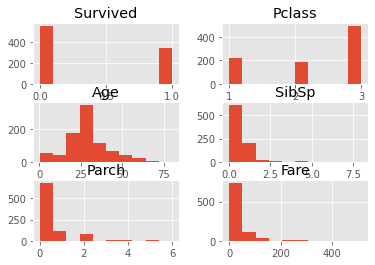

In [ ]:
train_df.hist()

# **Let us visualise our Testing Data Set.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9fd147850>,
      dtype=object)

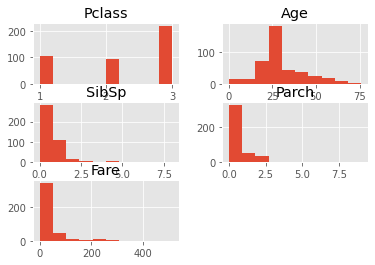

In [ ]:
test_df.hist()

# The **value_counts()** gives us count of Unique Values.

# Let's print the Unique Values of Columns in **Train** Data Set.

In [ ]:
####
# Gives us count of unique values of "Survived" in Train Data Set
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Pclass" in Train Data Set
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Sex" in Train Data Set
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
####
# Gives us count of unique values of "SibSp" in Train Data Set
train_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Parch" in Train Data Set
train_df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Embarked" in Train Data Set
train_df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Let's print the Unique Values of Columns in **Test** Data Frame.

In [ ]:
####
# Gives us count of unique values of "Pclass" in Test Data Set
test_df["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Sex" in Test Data Set
test_df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
####
# Gives us count of unique values of "SibSp" in Test Data Set
test_df["SibSp"].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Parch" in Test Data Set
test_df["Parch"].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [ ]:
####
# Gives us count of unique values of "Embarked" in Test Data Set
test_df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# In our Train and Test Data Sets, columns like "Pclass", "Sex", "Embarked" are of Categorical type. They should be converted into Numerical Data.

# Now let's convert the Categorical Data into Dummy Variables using get_dummies in pandas.

In the below block of code, since Pclass contains values 1, 2 and 3 it is converted into 2 variables Pclass_2, Pclass_3. 

If Pclass_2 = 0 and Pclass_3 = 0, then Original Variable Pclass = 1.

If Pclass_2 = 1 and Pclass_3 = 0, then Original Variable Pclass = 2.

If Pclass_2 = 0 and Pclass_3 = 1, then Original Variable Pclass = 3.

Similarly the other variables "Sex", "Embarked" are also converted into Dummy Variables.

In [ ]:
####
# Converting "Pclass", "Sex", "Embarked" into Dummy Variables
train_df = pd.get_dummies(train_df, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Pclass", "Sex", "Embarked"], drop_first=True)

In [ ]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [ ]:
test_df.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


# **Splitting the Data**

In [ ]:
####
# Now let's split the Data into Feature Matrix and Labels
# train_X = Feature Matrix containing all the Features
# train_Y = Contains all the Labels of the Input Data

train_X = train_df.iloc[:, 1:] # Selecting all Rows and Columns except 1st Column(Survived) into train_X
train_Y = train_df['Survived'].values.reshape(-1,1) # Selecting the Column(Survived) into train_Y

# test_X = Data for Testing as a Data Frame

test_X = test_df

# In our Testing and Training Data, Some Features like 'Age', 'SibSp', 'Fare' have large values. So we have to do **Feature Scaling** for these Features.

# If **Feature Scaling** is not done, then our **Model gives priority for Features with Higher Values than Features with Lower Values**.

In [ ]:
####
# Importing Required Packages for Feature Scaling

from sklearn.preprocessing import StandardScaler

st_sc = StandardScaler()

In [ ]:
####
# Scaling down the Features

features = ['Age', 'SibSp', 'Fare']

train_X[features] = st_sc.fit_transform(train_X[features])
test_X[features] = st_sc.fit_transform(test_X[features])


In [ ]:
train_X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.565736,0.432793,0,-0.502445,0,1,1,0,1
1,0.663861,0.432793,0,0.786845,0,0,0,0,0
2,-0.258337,-0.474545,0,-0.488854,0,1,0,0,1
3,0.433312,0.432793,0,0.420730,0,0,0,0,1
4,0.433312,-0.474545,0,-0.486337,0,1,1,0,1


In [ ]:
test_X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.386231,-0.499470,0,-0.497413,0,1,1,1,0
1,1.371370,0.616992,0,-0.512278,0,1,0,0,1
2,2.553537,-0.499470,0,-0.464100,1,0,1,1,0
3,-0.204852,-0.499470,0,-0.482475,0,1,1,0,1
4,-0.598908,0.616992,1,-0.417492,0,1,0,0,1


# **Implementing the Logistic Regression using sklearn**

# Now the Data is ready for the Model for Training and Testing.

In [ ]:
####
# Importing required packages for Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# Implementing Logistic Regression for train_X, train_Y.ravel()

classifier.fit(train_X, train_Y.ravel())

# Predicting the Labels of Test Data using Logistic Regression Model 

prediction = classifier.predict(test_X)

In [ ]:
####
# Score is the Accuracy of the Model for our Input Data
print(classifier.score(train_X,train_Y))

0.8058361391694725


In [ ]:
####
# Printing the prediction by the Model
print(prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
####
# Converting the Final Predictions to a Data Frame result
result= pd.DataFrame({'PassengerId' : x_test['PassengerId'], 'Survived': prediction })

result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
####
# Converting the result Data Frame into a CSV file.
result.to_csv('result.csv', index = False)

files.download('result.csv')

result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
